# Alzheimer's diesease prediction using text data set

In [ ]:
import pandas as pd
import nltk
import re
import contractions

In [ ]:
pip install contractions

In [ ]:
column_names=['label','text']

In [ ]:
data=pd.read_csv(r"/content/data (2).csv",encoding='unicode_escape',header=None,names=column_names)

In [ ]:
data

,label,text
0,positive,the scene is in the in the kitchen . the moth...
1,positive,oh I see the sink is running over . I see the...
2,positive,a boy and a girl are in the kitchen with thei...
3,positive,it was summertime and mother and the childre...
4,positive,wait until I put my glasses on . oh ? there's...
...,...,...
493,negative,well this one is in the cookie jar . and thi...
494,negative,the little boy is on the stool which is tipp...
495,negative,oh you want me to tell you . the mother and h...
496,negative,oh that kid's gonna get a good spill off of t...


# Preprocessing

In [ ]:
# Function to remove punctuations
def remove_punctuations(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [ ]:
# Function to remove words and digits containing digits
def remove_words_with_digits(text):
    cleaned_text = re.sub(r'\w*\d\w*', '', text)
    return cleaned_text

In [ ]:
# Function to remove extra spaces
def remove_extra_spaces(text):
    cleaned_text = re.sub(' +', ' ', text)
    return cleaned_text.strip()

In [ ]:
# Function to expand contractions
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text


In [ ]:
#Apply
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(remove_punctuations)
data['text'] = data['text'].apply(remove_words_with_digits)
data['text'] = data['text'].apply(remove_extra_spaces)
data['text'] = data['text'].apply(expand_contractions)

In [ ]:
data

,label,text
0,positive,the scene is in the in the kitchen the mother ...
1,positive,oh i see the sink is running over i see the st...
2,positive,a boy and a girl are in the kitchen with their...
3,positive,it was summertime and mother and the children ...
4,positive,wait until i put my glasses on oh there is a g...
...,...,...
493,negative,well this one is in the cookie jar and this is...
494,negative,the little boy is on the stool which is tippin...
495,negative,oh you want me to tell you the mother and her ...
496,negative,oh that kids going to get a good spill off of ...


# Naive Bayes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
# Create the feature vectors
# 1) tokenization - i do not know=>["i","do","not","know"] 2)building vocabulary assign numbers to unique words 3)frequency count
#term frequency-inverse document frequency (TF-IDF).



vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Multinomial Naive Bayes

In [ ]:

mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)
mnb_predictions = mnb.predict(X_test_vectorized)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)


Multinomial Naive Bayes Accuracy: 0.84


# Bernoulli Naive Bayes

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train_vectorized, y_train)
bnb_predictions = bnb.predict(X_test_vectorized)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)

Bernoulli Naive Bayes Accuracy: 0.8


# Performance metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate evaluation metrics for Multinomial Naive Bayes
print("Multinomial Naive Bayes Evaluation:")
print(classification_report(y_test, mnb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mnb_predictions))
print("AUC-ROC Score:", roc_auc_score(y_test, mnb.predict_proba(X_test_vectorized)[:, 1]))


Multinomial Naive Bayes Evaluation:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82        44
    positive       0.86      0.86      0.86        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

Confusion Matrix:
[[36  8]
 [ 8 48]]
AUC-ROC Score: 0.8938717532467532


In [ ]:

# Calculate evaluation metrics for Bernoulli Naive Bayes
print("Bernoulli Naive Bayes Evaluation:")
print(classification_report(y_test, bnb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, bnb_predictions))
print("AUC-ROC Score:", roc_auc_score(y_test, bnb.predict_proba(X_test_vectorized)[:, 1]))

Bernoulli Naive Bayes Evaluation:
              precision    recall  f1-score   support

    negative       0.76      0.80      0.78        44
    positive       0.83      0.80      0.82        56

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

Confusion Matrix:
[[35  9]
 [11 45]]
AUC-ROC Score: 0.8981331168831169


# SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


In [ ]:

# Train the SVM model
svm = SVC()
svm.fit(X_train_vectorized, y_train)

# Make predictions on the test set
svm_predictions = svm.predict(X_test_vectorized)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate the performance of the SVM model
print("SVM Evaluation:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("AUC-ROC Score:", roc_auc_score(y_test, svm.decision_function(X_test_vectorized)))


SVM Evaluation:
              precision    recall  f1-score   support

    negative       0.78      0.89      0.83        44
    positive       0.90      0.80      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100

Confusion Matrix:
[[39  5]
 [11 45]]
AUC-ROC Score: 0.9103084415584416


# Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vectorized, y_train)

# Make predictions on the test set
rf_predictions = random_forest.predict(X_test_vectorized)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.81
Precision: 0.8096613627090983
Recall: 0.81
F1 Score: 0.8097487539416133


# DecisionTree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the dataset from the CSV file
data = pd.read_csv(r"/content/data (2).csv", encoding='unicode_escape', header=None, names=['label', 'text'])

# Split the data into features and target variable
X = data['text']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.74
Precision: 0.8
Recall: 0.7142857142857143
F1 Score: 0.7547169811320756


**KNN ALGORITHM**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train_vectorized, y_train)
kn_predictions = kn.predict(X_test_vectorized)
kn_accuracy = accuracy_score(y_test, kn_predictions)
print("KNeighborsClassifier Accuracy:", kn_accuracy)

KNeighborsClassifier Accuracy: 0.83


# Performance metrics


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate evaluation metrics for Multinomial Naive Bayes
print("KNeighbors Classifier Evaluation:")
print(classification_report(y_test, kn_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, kn_predictions))
print("AUC-ROC Score:", roc_auc_score(y_test, kn.predict_proba(X_test_vectorized)[:, 1]))

KNeighbors Classifier Evaluation:
              precision    recall  f1-score   support

    negative       0.83      0.77      0.80        44
    positive       0.83      0.88      0.85        56

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.83      0.83      0.83       100

Confusion Matrix:
[[34 10]
 [ 7 49]]
AUC-ROC Score: 0.8906250000000001


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**LOGISTIC** **REGRESSION**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
log = LogisticRegression()
log.fit(X_train_vectorized, y_train)
log_predictions = log.predict(X_test_vectorized)
log_accuracy = accuracy_score(y_test, log_predictions)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Calculate evaluation metrics for Multinomial Naive Bayes
print("KNeighbors Classifier Evaluation:")
print(classification_report(y_test, kn_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, kn_predictions))
print("AUC-ROC Score:", roc_auc_score(y_test, kn.predict_proba(X_test_vectorized)[:, 1]))

KNeighbors Classifier Evaluation:
              precision    recall  f1-score   support

    negative       0.83      0.77      0.80        44
    positive       0.83      0.88      0.85        56

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.83      0.83      0.83       100

Confusion Matrix:
[[34 10]
 [ 7 49]]
AUC-ROC Score: 0.8906250000000001


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

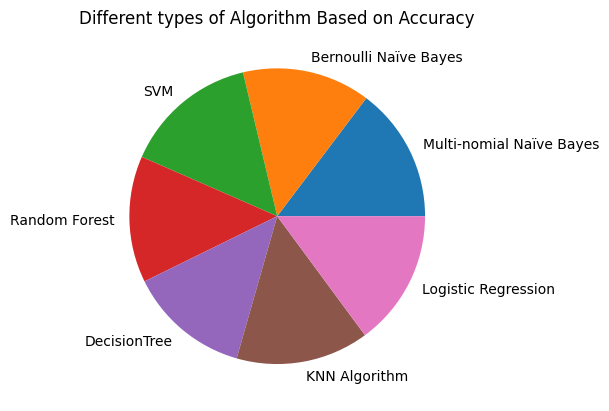

In [ ]:
y=np.array([0.84,0.80,0.84,0.79,0.76,0.83,0.85])
mylabels=["Multi-nomial Naïve Bayes","Bernoulli Naïve Bayes","SVM","Random Forest","DecisionTree","KNN Algorithm","Logistic Regression"]
plt.pie(y,labels=mylabels)
plt.title("Different types of Algorithm Based on Accuracy")
plt.show()